In [1]:
import torch
import numpy as np
import sys
sys.path.append('../')
from configs.base_config import TrainingConfig
from utils import get_dataloader, TransformFields
import matplotlib.pyplot as plt
import einops
from torch.nn.functional import interpolate


In [2]:
# Original path : /gpfswork/rech/omr/udu91zn/diffusionmodels/diffModel_experiences/z87envpm
base_path= '/Volumes/LoCe/oceandata/models/dino-fusion/' #'/Users/emeunier/Documents/scai/'
training_tar = ''
config = TrainingConfig()

In [3]:
train_dataloader = get_dataloader(config.data_file, batch_size=config.train_batch_size, fields=config.fields)
config.data_shape = train_dataloader.get_data_shape()
idt = iter(train_dataloader)
batch = next(idt)

Reading infos in /Volumes/LoCe/oceandata//Dino-Fusion/dino_1_4_degree_coarse_130924.tar


In [8]:
trf = train_dataloader.get_transform()

In [9]:
sample = trf.uncall(batch[0])

In [28]:
np.nanstd(sample_generated['soce.npy'].numpy())

0.9058828

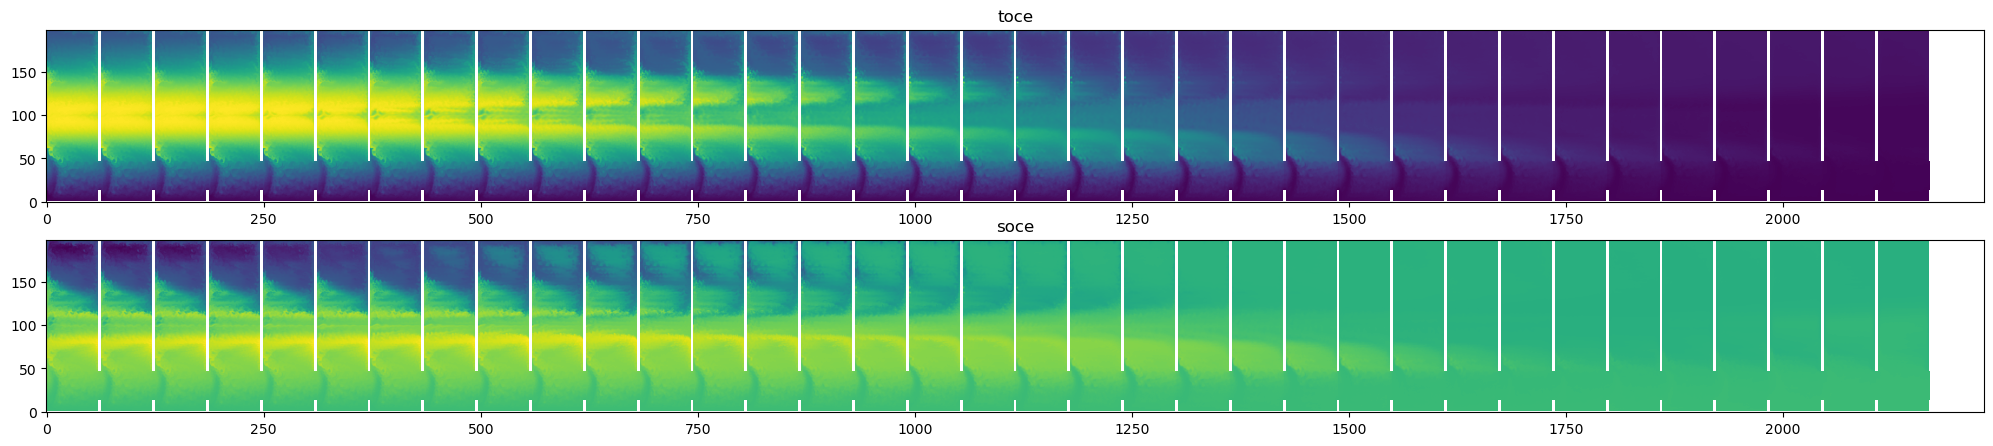

In [11]:
fig, axs = plt.subplots(2,1,figsize=(25,5))

for i, t in enumerate(['toce', 'soce']) :
    axs[i].set_title(t)
    axs[i].imshow(einops.rearrange(sample[f'{t}.npy'], 'z w h -> w (z h)'))
    axs[i].invert_yaxis()

In [24]:
path_generated=f'{base_path}/z87envpm/epoch_4950.npy'
generated_fields = torch.tensor(np.load(path_generated))
sample_generated = trf.uncall(generated_fields[0])

In [25]:
generated_fields.shape

torch.Size([8, 37, 208, 64])

In [26]:
np.nanstd(sample_generated['soce.npy'].numpy())

0.9058828

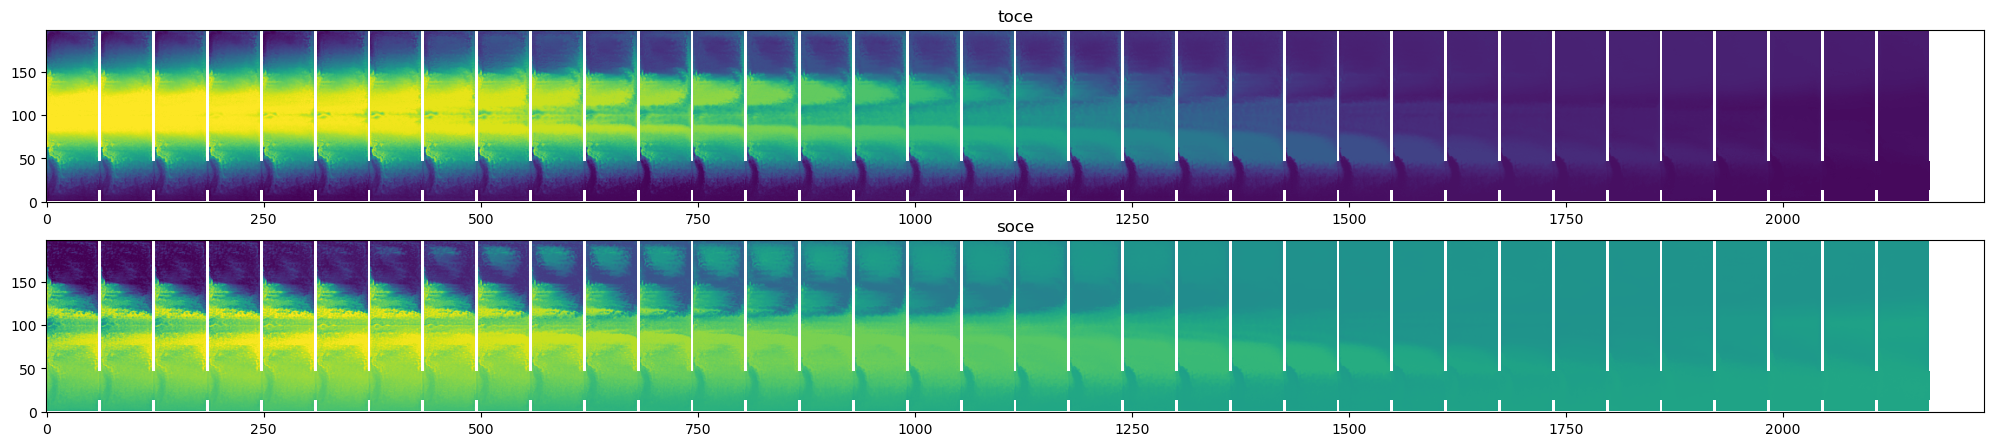

In [27]:
fig, axs = plt.subplots(2,1,figsize=(25,5))

for i, t in enumerate(['toce', 'soce']) :
    axs[i].set_title(t)
    axs[i].imshow(einops.rearrange(sample_generated[f'{t}.npy'], 'z w h -> w (z h)'))
    axs[i].invert_yaxis()